<h1>Table of Contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#import_libraries">Import Libraries</a></li>
        <li><a href="#import_dataset">Import "Breast Cancer Wisconsin (Original)" Dataset</a></li>
        <li><a href="#information">Information about the Dataset</a></li>
        <li><a href="#pre-processing">Pre-processing</a></li>        
        <li><a href="#feature_selection">Feature Selection</a></li>
        <li><a href="#classification">Classification</a></li>        
    </ol>
</div>
<br>
<hr>

<div id="import_libraries"> 
    <h2>Import Libraries</h2>    
</div>

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.cluster import DBSCAN
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LogisticRegression  
from sklearn.feature_selection import RFE 
from sklearn.feature_selection import mutual_info_classif
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV 

import warnings
warnings.filterwarnings("ignore")

<hr>
<div id="import_dataset"> 
    <h2>Import "Breast Cancer Wisconsin (Original)" Dataset</h2>         
</div>

**About the dataset:**  
<ul>  
    <li>  
        The "<strong>Breast Cancer Wisconsin (Original) Dataset</strong>" contains <strong>699 samples</strong> of breast cancer cases. Each sample includes the following <strong>10 features</strong>:  
        <ul>  
            <li><strong>ID number:</strong> An identifier for each sample.</li>  
            <li><strong>Clump Thickness:</strong> A measurement of the thickness of the clump of cells.</li>  
            <li><strong>Uniformity of Cell Size:</strong> Measures how uniform the size of the cells is.</li>  
            <li><strong>Uniformity of Cell Shape:</strong> Assesses how uniform the shape of the cells is.</li>  
            <li><strong>Marginal Adhesion:</strong> The adhesion of the cells at the margins.</li>  
            <li><strong>Single Epithelial Cell Size:</strong> The size of a single epithelial cell.</li>  
            <li><strong>Bare Nuclei:</strong> The presence of nuclei without surrounding cytoplasm.</li>  
            <li><strong>Bland Chromatin:</strong> The texture of the chromatin in the cell nucleus.</li>  
            <li><strong>Normal Nucleoli:</strong> The presence of normal nucleoli in the cells.</li>  
            <li><strong>Mitoses:</strong> The count of cells undergoing mitosis.</li>  
        </ul>  
        Additionally, the dataset includes a <strong>Class</strong> label indicating whether the tumor is <strong>benign (2)</strong> or <strong>malignant (4)</strong>.  
        <br><br>  
    </li>  
    <li>  
        This is a well-known dataset used for research in medical care and machine learning. Researchers and practitioners commonly use this dataset for:  
        <ol>  
            <li><strong>Classification Tasks:</strong> Predicting whether a breast mass is benign or malignant using machine learning algorithms.</li>  
            <li><strong>Feature Selection:</strong> Identifying the most relevant features for classification.</li>  
            <li><strong>Model Evaluation:</strong> Comparing the performance of different machine learning models on a standardized dataset.</li>  
            <li><strong>Educational Purposes:</strong> Teaching students and practitioners about data preprocessing, feature extraction, and model building in the context of machine learning.</li>  
        </ol>  
        <br>  
    </li>  
    <li>  
        Researchers have used this dataset to achieve various findings, including:  
        <ol>  
            <li><strong>Improved Classification Accuracy:</strong> Developing and refining machine learning models to enhance the accuracy of breast cancer diagnosis.</li>  
            <li><strong>Feature Importance:</strong> Identifying which features are most significant for distinguishing between benign and malignant masses.</li>  
            <li><strong>Model Comparisons:</strong> Comparing the performance of different algorithms (e.g., Decision Trees, Support Vector Machines, Neural Networks) to find the most effective approach for this task.</li>  
            <li><strong>Data Augmentation:</strong> Exploring techniques to augment the dataset and improve model performance.</li>  
        </ol>        
    </li>  
</ul>

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data" 
column_names = ["id number" , "Clump Thickness" , "Uniformity of Cell Size" , "Uniformity of Cell Shape" , "Marginal Adhesion" ,
                "Single Epithelial Cell Size" , "Bare Nuclei" , "Bland Chromatin" , "Normal Nucleoli" , "Mitoses" , "Class"]  
bcw_df = pd.read_csv(url, header=None, names=column_names)
display(bcw_df)

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


<hr>
<div id="information"> 
    <h2>Information about the Dataset</h2>    
</div>

In [ ]:
# Show summary statistics for the dataset
# This includes count, mean, standard deviation, minimum, 25%, 50%, 75%, and maximum values for numeric columns
print('\nThe dataset description:\n')

data_describe = bcw_df.describe()
display(data_describe)

In [ ]:
# Display a concise summary of the dataset
# This summary includes the index dtype, column dtypes, non-null values, and memory usage 
print('\nMore information about the dataset:\n')

data_information = bcw_df.info()
display(data_information)

In [ ]:
# Get the shape of the dataset, which returns the number of rows and columns
shape_of_the_dataset = bcw_df.shape
print("\nThe shape of the dataset -->", shape_of_the_dataset)

In [ ]:
# Calculate the number of unique values in each column of the dataset
print('\nNumber of unique data in the dataset:\n')

unique_data = bcw_df.nunique()
print(unique_data)

<hr>
<div id="pre-processing"> 
    <h2>Pre-processing</h2>    
</div>
<div>
    <ol>
        <li><a href="#duplicates">Duplicate Tuples</a></li>
        <li><a href="#outliers">Detecting Outliers (Noise)</a></li>
        <li><a href="#missing_values">Handling Missing Values</a></li>
        <li><a href="#standardization">Standardization</a></li>     
    </ol>
</div>
<br>

<hr>
<div id="duplicates"> 
    <h2>Duplicate Tuples</h2>    
</div>

In [3]:
# Deleting 'id number' column because it has no effect on learning process
bcw_df = bcw_df.drop('id number', axis=1)

In [4]:
# Calculate the number of duplicate rows in the dataframe
Num_of_duplicate_rows = bcw_df.duplicated().sum()
print("\nThe number of duplicate rows -->", Num_of_duplicate_rows)


The number of duplicate rows --> 236


In [5]:
# Identify all duplicated rows in the dataframe  
# 'duplicated(keep=False)' marks all duplicates (including the first occurrence as True)
df_all_duplicate = bcw_df[bcw_df.duplicated(keep=False)]
print("\nAll the rows and their duplicates:\n")
display(df_all_duplicate)


All the rows and their duplicates:



,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
4,4,1,1,3,2,1,3,1,1,2
10,1,1,1,1,1,1,3,1,1,2
11,2,1,1,1,2,1,2,1,1,2
16,4,1,1,1,2,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...
686,1,1,1,1,2,1,1,1,1,2
688,4,1,1,1,2,1,1,1,1,2
690,1,1,1,3,2,1,1,1,1,2
692,3,1,1,1,2,1,1,1,1,2


In [6]:
# Identify only the duplicated rows in the dataframe
# 'duplicated()' without any parameters, meaning its output only shows the rows that are duplicates and excludes the first occurrences
duplicate = bcw_df[bcw_df.duplicated()]
print("\nJust duplicate rows:\n")
display(duplicate)


Just duplicate rows:



,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
28,2,1,1,1,2,1,2,1,1,2
35,2,1,1,1,2,1,2,1,1,2
48,4,1,1,3,2,1,3,1,1,2
64,1,1,1,1,2,1,2,1,1,2
66,4,1,1,1,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
686,1,1,1,1,2,1,1,1,1,2
688,4,1,1,1,2,1,1,1,1,2
690,1,1,1,3,2,1,1,1,1,2
692,3,1,1,1,2,1,1,1,1,2


In [7]:
# Drop all duplicate rows from the dataframe
# df_ADD --> df_after dropping duplicates
df_ADD = bcw_df.drop_duplicates()
print("\nThe dataset after dropping the duplicate tuples:\n")
display(df_ADD)


The dataset after dropping the duplicate tuples:



,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,2,1,2,1,2,2
694,3,1,1,1,3,2,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


<hr>
<div id="outliers"> 
    <h2>Detecting Outliers (Noise)</h2>    
</div>
<div>
    <ol>
        <li><a href="#iqr">Interquartile Range (IQR) method</a></li> 
        <li><a href="#db_scan">DBSCAN Clustering (Density-Based Spatial Clustering)</a></li> 
        <li><a href="#output">Output the results</a></li>        
    </ol>
</div>
<br>

<div id="iqr"> 
    <h2>Interquartile Range (IQR) method</h2>    
</div>

In [8]:
# Select only numeric columns from the dataframe
# Ignore the 'Bare Nuclei' column from the original dataframe, because its type is object 
numeric_df = df_ADD.select_dtypes(include=['number'])

In [9]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)  
Q1 = numeric_df.quantile(0.25)  
Q3 = numeric_df.quantile(0.75)  
IQR = Q3 - Q1  

# Define the outlier detection bounds  
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  

In [10]:
# Create a mask to filter out rows with outliers  
outlier_mask = ~((numeric_df < lower_bound) |   
                 (numeric_df > upper_bound)).any(axis=1)  

# Create a new dataframe after outlier detection and deleting 
df_iqr = numeric_df[outlier_mask]  
display(df_iqr)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,3,1,1,2
1,5,4,4,5,7,3,2,1,2
2,3,1,1,1,2,3,1,1,2
3,6,8,8,1,3,3,7,1,2
4,4,1,1,3,2,3,1,1,2
...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,2,2,1,2,2
694,3,1,1,1,3,1,1,1,2
696,5,10,10,3,7,8,10,2,4
697,4,8,6,4,3,10,6,1,4


In [11]:
# Validate the IQR method
# Separate features and target variable  
x = df_iqr.drop('Class', axis=1)            # Features
y = df_iqr['Class']                         # Target variable

# Split the data into training and testing sets (80/20) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  

In [12]:
# Initialize the KNN classifier  
clf_iqr = KNeighborsClassifier(n_neighbors=1)  

# Perform cross-validation to check accuracy after IQR outlier removal  
accuracy_iqr = np.mean(cross_val_score(clf_iqr, x_train, y_train, scoring='accuracy', cv=10))  
print(f'\nCross-validated accuracy after IQR outlier removal: {accuracy_iqr:.4f}\n')


Cross-validated accuracy after IQR outlier removal: 0.8850



In [13]:
# Add the 'Bare Nuclei' column from the original dataframe 
df_iqr['Bare Nuclei'] = df_ADD['Bare Nuclei']

# Specify the desired column order
columns_order = ["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion",
                 "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]

In [14]:
# Reorder the dataframe columns
df_iqr = df_iqr[columns_order].reset_index(drop=True)

# Display updated dataframe
print("Updated dataframe:") 
display(df_iqr)

Updated dataframe:


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
388,3,1,1,1,2,1,2,1,2,2
389,3,1,1,1,3,2,1,1,1,2
390,5,10,10,3,7,3,8,10,2,4
391,4,8,6,4,3,4,10,6,1,4


<div id="db_scan"> 
    <h2>DBSCAN Clustering (Density-Based Spatial Clustering)</h2>    
</div>

In [15]:
# Select only numeric columns from the dataframe, ignoring the 'Bare Nuclei' column (datatype: object)  
numeric_df = df_ADD.select_dtypes(include=['number'])

In [16]:
# Standardize the features (z-score normalization) 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(numeric_df.drop(columns=["Class"]))

# Set the parameters for DBSCAN: eps and min_samples
dbs = DBSCAN(eps=2, min_samples=5).fit(X_scaled)

In [17]:
# Labels of the clusters(outliers will have the label -1) 
labels = dbs.labels_

# Add cluster labels to the dataframe 
numeric_df['Cluster'] = labels

In [18]:
# Filter out the outliers (rows with label -1) 
df_dbs = numeric_df[numeric_df['Cluster'] != -1]

# Display the dataframe without outliers 
print("\nDataframe after removing outliers:\n") 
display(df_dbs)


Dataframe after removing outliers:



,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Cluster
0,5,1,1,1,2,3,1,1,2,0
1,5,4,4,5,7,3,2,1,2,0
2,3,1,1,1,2,3,1,1,2,0
3,6,8,8,1,3,3,7,1,2,0
4,4,1,1,3,2,3,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,2,2,1,2,2,0
694,3,1,1,1,3,1,1,1,2,0
696,5,10,10,3,7,8,10,2,4,0
697,4,8,6,4,3,10,6,1,4,0


In [19]:
# Display the number of detected outliers 
n_outliers = (labels == -1).sum() 
print(f'\nNumber of outliers detected: {n_outliers}\n')


Number of outliers detected: 24



In [20]:
# Display the number of clusters, ignoring noise if present 
n_clusters = len(set(labels)) - (1 if -1 in labels else 0) 
print(f'\nEstimated number of clusters: {n_clusters}\n')


Estimated number of clusters: 1



In [21]:
# Validate the DBSCAN method
# Separate features and target variable  
x = df_dbs.drop('Class', axis=1)            # Features
y = df_dbs['Class']                         # Target variable

# Split the data into training and testing sets (80/20) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  

In [22]:
# Initialize the KNN classifier  
clf_dbs = KNeighborsClassifier(n_neighbors=1)  

# Perform cross-validation to check accuracy after DBSCAN outlier removal  
accuracy_dbs = np.mean(cross_val_score(clf_dbs, x_train, y_train, scoring='accuracy', cv=10))  
print(f'\nCross-validated accuracy after DBSCAN outlier removal: {accuracy_dbs:.4f}\n')


Cross-validated accuracy after DBSCAN outlier removal: 0.9029



In [23]:
# Remove the 'Cluster' column to clean up the dataframe
df_dbs = df_dbs.drop(columns=['Cluster'])

# Add the 'Bare Nuclei' column from the original dataframe 
df_dbs['Bare Nuclei'] = df_ADD['Bare Nuclei']

# Specify the desired column order for the final dataframe
columns_order = ["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion",
                 "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]

In [24]:
# Reorder the dataframe columns
df_dbs = df_dbs[columns_order].reset_index(drop=True)

# Display updated dataframe
print("\nUpdated dataframe:\n") 
display(df_dbs)


Updated dataframe:



,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
434,3,1,1,1,2,1,2,1,2,2
435,3,1,1,1,3,2,1,1,1,2
436,5,10,10,3,7,3,8,10,2,4
437,4,8,6,4,3,4,10,6,1,4


<div id="output"> 
    <h2>Output the results</h2>    
</div>

In [25]:
# Output the results of different outlier detection methods   
print('\nIQR result:', accuracy_iqr)                   # Print accuracy score for the iqr method  
print('\nDBSCAN clustering result:', accuracy_dbs)     # Print accuracy score for the dbscan clustering method 


IQR result: 0.8849798387096774

DBSCAN clustering result: 0.902936507936508


In [26]:
print("\nContinue working with DBSCAN Clustering after comparing different outlier detection methods:\n")
display(df_dbs.head())


Continue working with DBSCAN Clustering after comparing different outlier detection methods:



,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [27]:
# Get the shape of the dataset
print("\nDataset shape before dropping duplicate tuples -->", bcw_df.shape)
print("\nDataset shape after dropping duplicate tuples -->", df_ADD.shape)
print("\nDataset shape after deleting the outliers -->", df_dbs.shape)


Dataset shape before dropping duplicate tuples --> (699, 10)

Dataset shape after dropping duplicate tuples --> (463, 10)

Dataset shape after deleting the outliers --> (439, 10)


<hr>
<div id="missing_values"> 
    <h2>Handling Missing Values</h2>    
</div>
<div>
    <ol>
        <li><a href="#drop">Drop Imputation</a></li>
        <li><a href="#median">Median Imputation</a></li>        
        <li><a href="#iterative">Iterative Imputation</a></li> 
        <li><a href="#mice">Multiple Imputation by Chained Equations (MICE)</a></li>       
        <li><a href="#output">Output the results</a></li>    
    </ol>
</div>
<br>

In [28]:
# Display a concise summary of the dataset after deleting the outliers
# This summary includes the index dtype, column dtypes, non-null values, and memory usage 
print('\nMore information about the dataset after deleting the outliers:\n')

data_information = df_dbs.info()
display(data_information)


More information about the dataset after deleting the outliers:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              439 non-null    int64 
 1   Uniformity of Cell Size      439 non-null    int64 
 2   Uniformity of Cell Shape     439 non-null    int64 
 3   Marginal Adhesion            439 non-null    int64 
 4   Single Epithelial Cell Size  439 non-null    int64 
 5   Bare Nuclei                  439 non-null    object
 6   Bland Chromatin              439 non-null    int64 
 7   Normal Nucleoli              439 non-null    int64 
 8   Mitoses                      439 non-null    int64 
 9   Class                        439 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 34.4+ KB


None

In [29]:
# Check the distribution of the 'Bare Nuclei' column
df_dbs['Bare Nuclei'].value_counts()

Bare Nuclei
1     169
10    121
2      28
5      28
3      27
8      19
4      17
?      14
7       7
9       6
6       3
Name: count, dtype: int64

In [30]:
# Check for missing values in the dataframe
isna = pd.DataFrame(df_dbs.isna().sum(axis=0))
print(isna)

                             0
Clump Thickness              0
Uniformity of Cell Size      0
Uniformity of Cell Shape     0
Marginal Adhesion            0
Single Epithelial Cell Size  0
Bare Nuclei                  0
Bland Chromatin              0
Normal Nucleoli              0
Mitoses                      0
Class                        0


In [31]:
print('\nThere are no NaN values in the dataset')
print('But according to the description, it has the missing values are in other shapes')


There are no NaN values in the dataset
But according to the description, it has the missing values are in other shapes


In [32]:
# Find missing values ​​in other shapes
# Define unwanted values and consider them as null/missing  
unwanted_values = ['?', '!', '$', 'None', 'null', '']

# Replace unwanted values with NaN   
df_dbs.replace(unwanted_values, np.nan, inplace=True)

In [33]:
# Check for any NaN values now present in the dataframe  
missing_values_count = df_dbs.isna().sum() 

# Display the count of missing values for each column  
print("\nCount of missing values in each column:")  
print(missing_values_count[missing_values_count > 0])


Count of missing values in each column:
Bare Nuclei    14
dtype: int64


In [34]:
# Display rows with missing values  
rows_with_missing = df_dbs[df_dbs.isna().any(axis=1)]  
print("\nRows with missing values:")  
display(rows_with_missing)


Rows with missing values:


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,8,4,5,1,2,NaN,7,3,1,4
38,6,6,6,9,6,NaN,7,8,1,2
112,1,1,1,1,1,NaN,2,1,1,2
115,1,1,3,1,2,NaN,2,1,1,2
125,1,1,2,1,3,NaN,1,1,1,2
130,5,1,1,1,2,NaN,3,1,1,2
174,3,1,4,1,2,NaN,3,1,1,2
185,3,1,1,1,2,NaN,3,1,1,2
201,3,1,3,1,2,NaN,2,1,1,2
209,8,8,8,1,2,NaN,6,10,1,4


In [35]:
# Convert 'Bare Nuclei' column to float
df_dbs['Bare Nuclei'] = df_dbs['Bare Nuclei'].astype("float")

<div id="drop"> 
    <h2>Drop Imputation</h2>    
</div>

In [36]:
# Create a copy of the original dataset 
DfDrop = df_dbs.copy(deep=True)

# Fill missing values in 'Bare Nuclei' with '0'
DfDrop['Bare Nuclei'] = DfDrop['Bare Nuclei'].fillna(0)

In [37]:
# Drop rows where 'Bare Nuclei' is 0 
DfDrop.drop(DfDrop.index[(DfDrop["Bare Nuclei"] == 0)],axis=0,inplace=True)

# Preview the data after drop imputation  
print('\nPreview the data after drop imputation: \n')
display(DfDrop.head())


Preview the data after drop imputation: 



,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


<div id="median"> 
    <h2>Median Imputation</h2>    
</div>

In [38]:
# Create a copy of the original dataset   
DfDrop_med = df_dbs.copy(deep=True)

# Fill missing values in 'Bare Nuclei'  
# Fill with the median of the column
median_bare_nuclei = DfDrop_med['Bare Nuclei'].median()
DfDrop_med['Bare Nuclei'].fillna(median_bare_nuclei, inplace=True) 

In [39]:
# Preview the data after median imputation  
print('\nPreview the data after median imputation: \n')
display(DfDrop_med.head())


Preview the data after median imputation: 



,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


<div id="iterative"> 
    <h2>Iterative Imputation</h2>    
</div>

In [40]:
# Create a copy of the original dataset  
DfIterative = df_dbs.copy(deep=True)  

# Keep only numeric columns for iterative imputation
df_ite_numeric = DfIterative.select_dtypes(include=[np.number])  

In [41]:
# Set up the iterative imputer  
imputer_ite = IterativeImputer(missing_values=np.nan, sample_posterior=True, min_value=0, 
                               random_state=0)  

# Performe the iterative imputation  
imputed_data_ite = imputer_ite.fit_transform(df_ite_numeric)  

In [42]:
# Convert back to dataframe  
DfIterative[df_ite_numeric.columns] = imputed_data_ite  

# Preview the data after iterative imputation  
print('\nPreview the data after iterative imputation:\n')
display(DfIterative.head())


Preview the data after iterative imputation:



,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


<div id="mice"> 
    <h2>Multiple Imputation by Chained Equations (MICE)</h2>    
</div>

In [43]:
# Create a copy of the original dataset  
DfMice = df_dbs.copy(deep=True)  

# Keep only numeric columns for MICE imputation
df_mice_numeric = DfMice.select_dtypes(include=[np.number]) 

In [44]:
# Set up the iterative imputer  
single_imputer = IterativeImputer(missing_values=np.nan, random_state=0)  

# Perform the imputation only on numeric data  
imputed_data_mice = single_imputer.fit_transform(df_mice_numeric)

In [45]:
# Assign the imputed values back into the original dataframe  
DfMice[df_mice_numeric.columns] = imputed_data_mice  

# Preview the data after MICE imputation  
print('\nPreview the data after MICE imputation:\n')
display(DfMice.head())


Preview the data after MICE imputation:



,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


<div id="output"> 
    <h2>Output the results</h2>    
</div>

Compare the different Imputation Methods using **Kernel Density Estimation (KDE) Plots**

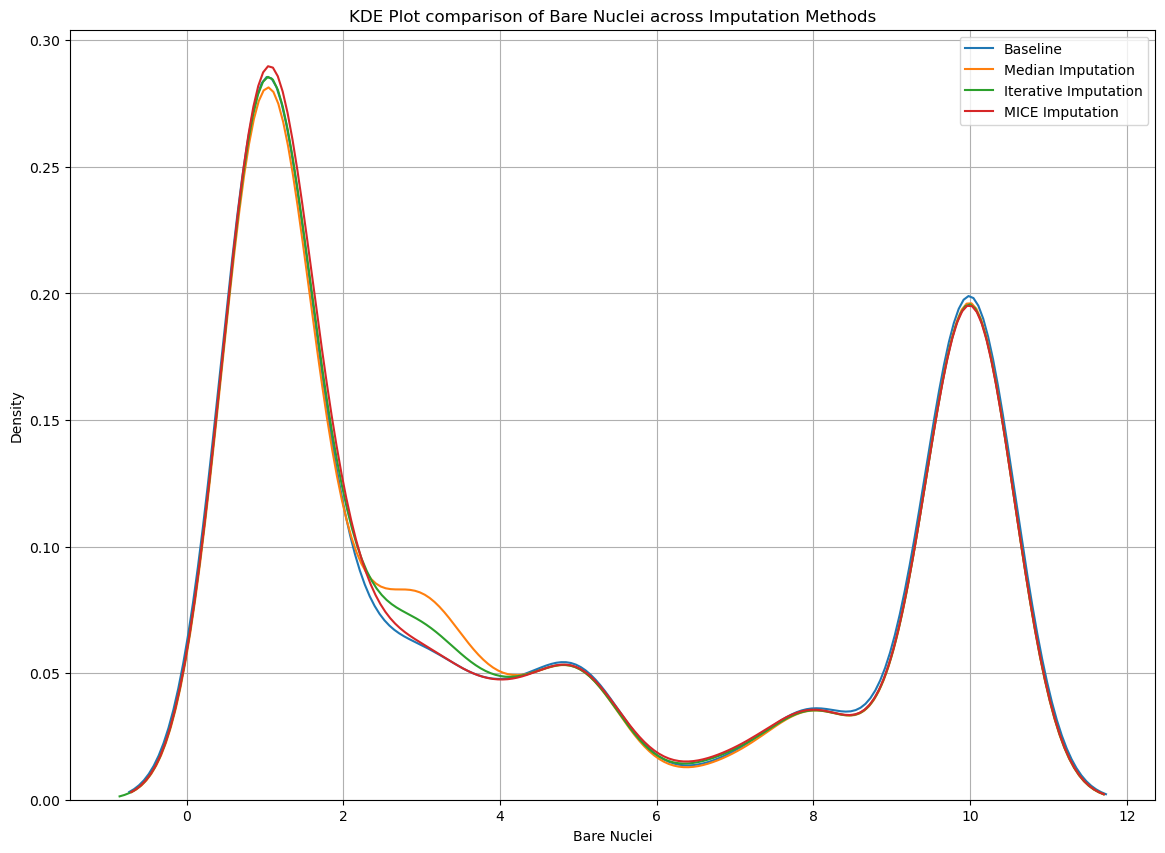

In [ ]:
# 'Bare Nuclei' column 
# Setup the plotting environment  
plt.figure(figsize=(14, 10))  

# KDE for 'Bare Nuclei' column  
sns.kdeplot(df_dbs['Bare Nuclei'], label='Baseline', fill=False, bw_adjust=0.5)
sns.kdeplot(DfDrop['Bare Nuclei'], label='Drop Imputation', fill=False, bw_adjust=0.5) 
sns.kdeplot(DfDrop_med['Bare Nuclei'], label='Median Imputation', fill=False, bw_adjust=0.5)   
sns.kdeplot(DfIterative['Bare Nuclei'], label='Iterative Imputation', fill=False, bw_adjust=0.5)
sns.kdeplot(DfMice['Bare Nuclei'], label='MICE Imputation', fill=False, bw_adjust=0.5) 

# Aesthetic aspects of the plot  
plt.title('KDE Plot comparison of Bare Nuclei across Imputation Methods')  
plt.xlabel('Bare Nuclei')  
plt.ylabel('Density')  
plt.legend()  
plt.grid(True)  
plt.show() 

In [214]:
print("\nContinue working with drop imputation after comparing different imputation methods:\n")
display(DfDrop)


Continue working with drop imputation after comparing different imputation methods:



,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
434,3,1,1,1,2,1.0,2,1,2,2
435,3,1,1,1,3,2.0,1,1,1,2
436,5,10,10,3,7,3.0,8,10,2,4
437,4,8,6,4,3,4.0,10,6,1,4


<hr>
<div id="standardization"> 
    <h2>Standardization</h2>    
</div>
<div>
    <ol>
        <li><a href="#z-score">Z-Score Standardization (Standard Scaling)</a></li>
        <li><a href="#min-max">Min-Max Scaling (Normalization)</a></li>         
        <li><a href="#output">Output the results</a></li>     
    </ol>
</div>
<br>

<div id="z-score"> 
    <h2>Z-Score Standardization (Standard Scaling)</h2>    
</div>

In [215]:
# Apply the Z-score standardization
Z_scaler = StandardScaler()  
Z_Scaled = Z_scaler.fit_transform(DfDrop)

# Create a new dataframe with the scaled data  
df_Z_Scaled = pd.DataFrame(Z_Scaled, columns = list(DfDrop.columns))

In [216]:
# Use all columns except 'Class'
df_Z_Scaled_final = df_Z_Scaled.drop('Class', axis = 1)

# Add the 'Class' column back to the dataframe
df_Z_Scaled_final['Class'] = DfDrop['Class'].tolist()
display(df_Z_Scaled_final)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,-0.101794,-0.958365,-1.012208,-0.851002,-0.737833,-0.955748,-0.423712,-0.814204,-0.398327,2
1,-0.101794,-0.027027,-0.052680,0.443008,1.451965,1.369784,-0.423712,-0.517940,-0.398327,2
2,-0.805248,-0.958365,-1.012208,-0.851002,-0.737833,-0.697356,-0.423712,-0.814204,-0.398327,2
3,0.249933,1.214757,1.226691,-0.851002,-0.299873,-0.180571,-0.423712,0.963382,-0.398327,2
4,-0.453521,-0.958365,-1.012208,-0.203997,-0.737833,-0.955748,-0.423712,-0.814204,-0.398327,2
...,...,...,...,...,...,...,...,...,...,...
420,-0.805248,-0.958365,-1.012208,-0.851002,-0.737833,-0.955748,-0.805232,-0.814204,0.219516,2
421,-0.805248,-0.958365,-1.012208,-0.851002,-0.299873,-0.697356,-1.186753,-0.814204,-0.398327,2
422,-0.101794,1.835649,1.866377,-0.203997,1.451965,-0.438963,1.483890,1.852175,0.219516,4
423,-0.453521,1.214757,0.587006,0.119506,-0.299873,-0.180571,2.246931,0.667118,-0.398327,4


In [217]:
# Perform data manipulation in the 'Class' column
df_Z_Scaled_final['Class'] = df_Z_Scaled_final['Class'].replace({2: 0, 4: 1}) 

In [218]:
# Validate the Z-score standardization
# Separate features and target variable  
x_z = df_Z_Scaled_final.drop('Class', axis = 1)               # Features
y_z = df_Z_Scaled_final['Class']                              # Target variable

# Split the data into training and testing sets (80/20)  
x_train_z, x_test_z, y_train_z, y_test_z = train_test_split(x_z, y_z, test_size=0.2, random_state=0)  

In [219]:
# Initialize the KNN classifier  
clf_z = KNeighborsClassifier(n_neighbors=10)  

# Perform cross-validation to check accuracy after the Z-standard scaling  
accuracy_z = np.mean(cross_val_score(clf_z, x_train_z, y_train_z, scoring='accuracy', cv=10)) 
print(f'\nCross-validated accuracy after the Z-standard scaling: {accuracy_z:.4f}\n')


Cross-validated accuracy after the Z-standard scaling: 0.9529



<div id="min-max"> 
    <h2>Min-Max Scaling (Normalization)</h2>    
</div>

In [220]:
# Apply Min Max scaler
MM_scaler = MinMaxScaler()
Min_Max_Scaled = MM_scaler.fit_transform(DfDrop)

# Create a new dataframe with the scaled data 
df_Min_Max_Scaled_final = pd.DataFrame(Min_Max_Scaled, columns = list(DfDrop.columns))
display(df_Min_Max_Scaled_final)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.000000,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
420,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.111111,0.0
421,0.222222,0.000000,0.000000,0.000000,0.222222,0.111111,0.000000,0.000000,0.000000,0.0
422,0.444444,1.000000,1.000000,0.222222,0.666667,0.222222,0.777778,1.000000,0.111111,1.0
423,0.333333,0.777778,0.555556,0.333333,0.222222,0.333333,1.000000,0.555556,0.000000,1.0


In [221]:
# Validate the Min Max Scaler
# Separate features and target variable  
x_mm = df_Min_Max_Scaled_final.drop('Class', axis = 1)            # Features
y_mm = df_Min_Max_Scaled_final['Class']                           # Target variable

# Split the data into training and testing sets (80/20) 
x_train_mm, x_test_mm, y_train_mm, y_test_mm = train_test_split(x_mm, y_mm, test_size=0.2, random_state=0) 

In [222]:
# Initialize the KNN classifier  
clf_mm = KNeighborsClassifier(n_neighbors=10)  

# Perform cross-validation to check accuracy after the Min Max scaling  
accuracy_mm = np.mean(cross_val_score(clf_mm, x_train_mm, y_train_mm, scoring='accuracy', cv=10))
print(f'\nCross-validated accuracy after the Min Max scaling: {accuracy_mm:.4f}\n')


Cross-validated accuracy after the Min Max scaling: 0.9441



<div id="output"> 
    <h2>Output the results</h2>    
</div>

In [223]:
# Output the results of different standardization methods   
print('\nZ-standard scaling result:', accuracy_z)  # Print accuracy score for the z-score standardization method  
print('\nMin Max scaling result:', accuracy_mm)    # Print accuracy score for the min max scaler method 


Z-standard scaling result: 0.9529411764705882

Min Max scaling result: 0.9441176470588235


In [224]:
print("\nContinue working with the dataset scaled by Z-standard scaling after comparing different scaling methods:\n")
df_Scaled = df_Z_Scaled_final
display(df_Scaled.head())


Continue working with the dataset scaled by Z-standard scaling after comparing different scaling methods:



,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,-0.101794,-0.958365,-1.012208,-0.851002,-0.737833,-0.955748,-0.423712,-0.814204,-0.398327,0
1,-0.101794,-0.027027,-0.052680,0.443008,1.451965,1.369784,-0.423712,-0.517940,-0.398327,0
2,-0.805248,-0.958365,-1.012208,-0.851002,-0.737833,-0.697356,-0.423712,-0.814204,-0.398327,0
3,0.249933,1.214757,1.226691,-0.851002,-0.299873,-0.180571,-0.423712,0.963382,-0.398327,0
4,-0.453521,-0.958365,-1.012208,-0.203997,-0.737833,-0.955748,-0.423712,-0.814204,-0.398327,0


<hr>
<div id="feature_selection"> 
    <h2>Feature Selection</h2>    
</div>
<div>
    <ol>
        <li><a href="#fm">Filter Method (Correlation Analysis)</a></li>
        <li><a href="#rfe">Recursive Feature Elimination (RFE)</a></li>        
        <li><a href="#mi">Mutual Information</a></li>       
        <li><a href="#output">Output the results</a></li> 		
    </ol>
</div>
<br>

<div id="fm"> 
    <h2>Filter Method (Correlation Analysis)</h2>    
</div>

In [225]:
# Calculate correlation matrix
corr = df_Scaled.corr()
print('\nCorrelation between the features in the dataset:\n')

# Display the correlation matrix
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(corr)


Correlation between the features in the dataset:



,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.591255,0.589418,0.403584,0.462047,0.532481,0.512893,0.450399,0.267269,0.674251
Uniformity of Cell Size,0.591255,1.000000,0.891521,0.644092,0.709779,0.595709,0.714804,0.678296,0.406245,0.760349
Uniformity of Cell Shape,0.589418,0.891521,1.000000,0.631498,0.686901,0.619756,0.692324,0.672141,0.391911,0.764491
Marginal Adhesion,0.403584,0.644092,0.631498,1.000000,0.535554,0.600027,0.611992,0.558698,0.399381,0.637393
Single Epithelial Cell Size,0.462047,0.709779,0.686901,0.535554,1.000000,0.499963,0.579045,0.576484,0.416640,0.620683
Bare Nuclei,0.532481,0.595709,0.619756,0.600027,0.499963,1.000000,0.598719,0.490436,0.266899,0.771107
Bland Chromatin,0.512893,0.714804,0.692324,0.611992,0.579045,0.598719,1.000000,0.630003,0.279924,0.713570
Normal Nucleoli,0.450399,0.678296,0.672141,0.558698,0.576484,0.490436,0.630003,1.000000,0.397093,0.654747
Mitoses,0.267269,0.406245,0.391911,0.399381,0.416640,0.266899,0.279924,0.397093,1.000000,0.313074
Class,0.674251,0.760349,0.764491,0.637393,0.620683,0.771107,0.713570,0.654747,0.313074,1.000000



Visualizing the correlation of the dataset:



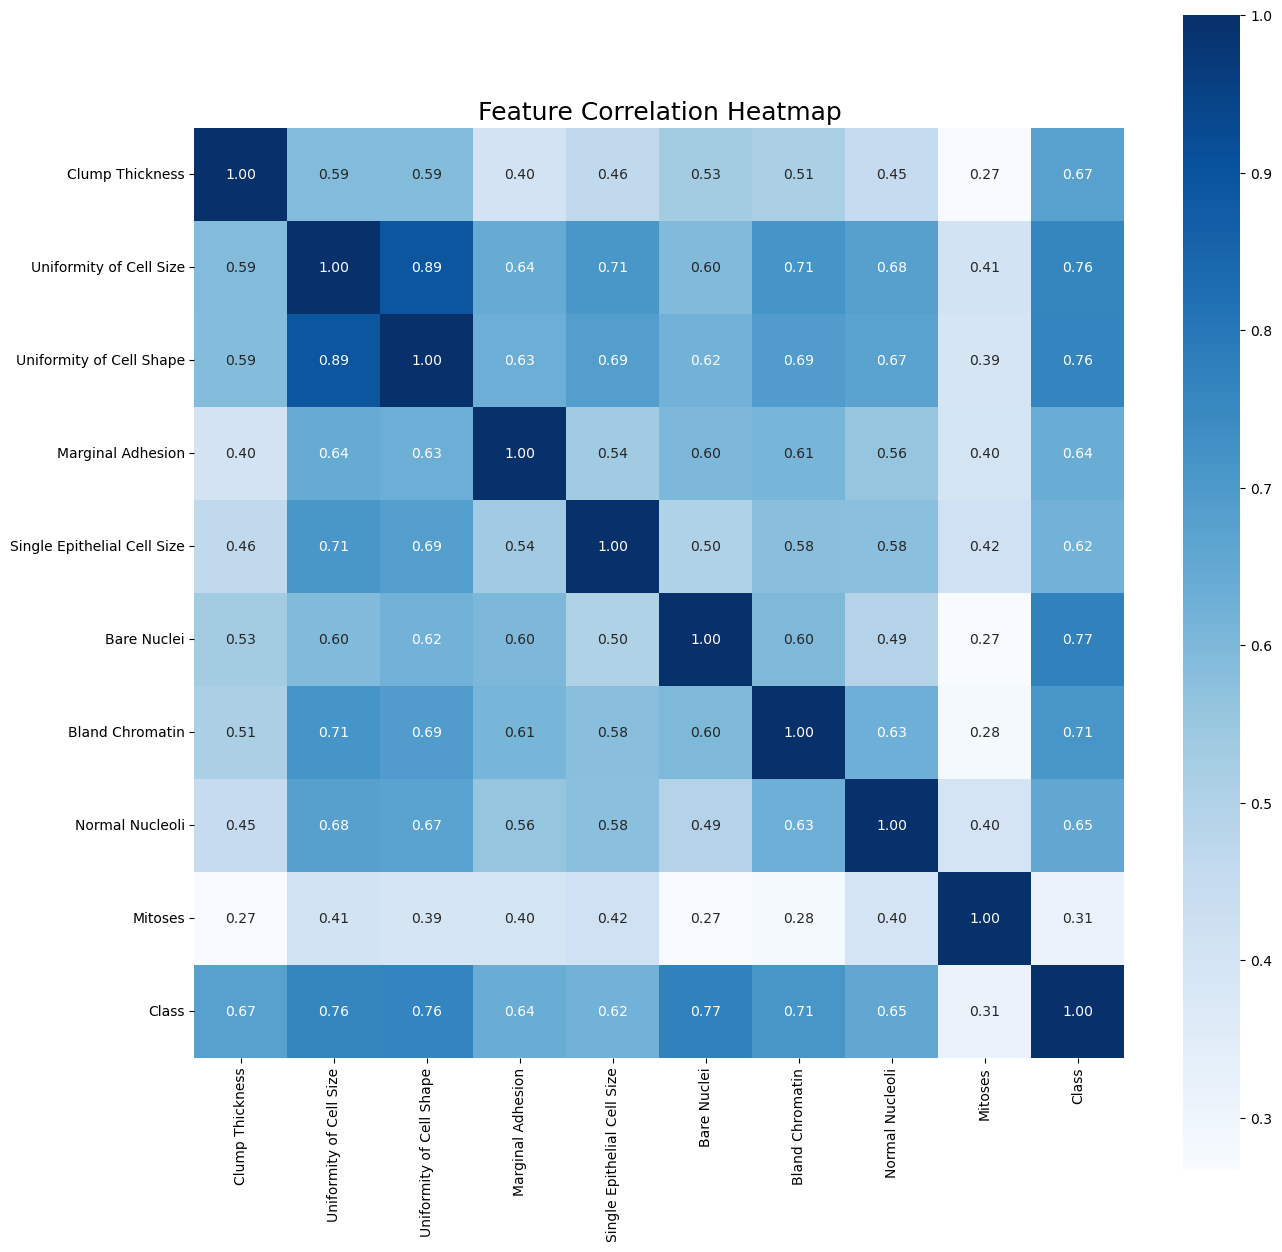

In [226]:
# Visualize the correlation matrix using a heatmap plot
# Setup the plotting environment 
plt.figure(figsize=(15,15))
print('\nVisualizing the correlation of the dataset:\n')

# Heatmap plot for correlation
sns.heatmap(corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='Blues')

# Aesthetic aspects of the plot
plt.title('Feature Correlation Heatmap', fontsize=18)  
plt.show()

In [227]:
# Get and print correlation of 'Class' with other features
print("\nThe correlation of 'Class' with other features:\n")
class_corr = df_Scaled.corr()['Class'].sort_values(ascending=False) 
print(class_corr) 


The correlation of 'Class' with other features:

Class                          1.000000
Bare Nuclei                    0.771107
Uniformity of Cell Shape       0.764491
Uniformity of Cell Size        0.760349
Bland Chromatin                0.713570
Clump Thickness                0.674251
Normal Nucleoli                0.654747
Marginal Adhesion              0.637393
Single Epithelial Cell Size    0.620683
Mitoses                        0.313074
Name: Class, dtype: float64


In [228]:
# Select features with correlation >= 0.6 with 'Class'
# Apply abs() to consider both positive and negative correlations
significant_features_fm = class_corr[class_corr.abs() >= 0.6].index.tolist()    

# Remove 'Class' from the list of significant features
significant_features_fm = [feature for feature in significant_features_fm if feature != 'Class']            
print("\nChoosing features that have correlation >= 0.6':\n", significant_features_fm) 


Choosing features that have correlation >= 0.6':
 ['Bare Nuclei', 'Uniformity of Cell Shape', 'Uniformity of Cell Size', 'Bland Chromatin', 'Clump Thickness', 'Normal Nucleoli', 'Marginal Adhesion', 'Single Epithelial Cell Size']


In [229]:
# Validate filter method
# Separate features and target variable
x_fm = df_Scaled[significant_features_fm].drop(columns=['Class'], errors='ignore')        # Features 
y_fm = df_Scaled['Class']                                                                 # Target variable

# Split the dataset into training and testing sets (80/20) with random state  
X_train, X_test, y_train, y_test = train_test_split(x_fm, y_fm, test_size=0.2, random_state=0, stratify=y_fm)

In [230]:
# Initialize the KNN classifier
clf_fm = KNeighborsClassifier(n_neighbors=1)  

# Perform cross-validation to check accuracy after filter method 
accuracy_fm = np.mean(cross_val_score(clf_fm, x_fm, y_fm, scoring='accuracy', cv=10))  
print(f"\nCross-validated accuracy after filter method: {accuracy_fm:.4f}") 


Cross-validated accuracy after filter method: 0.9321


<div id="rfe"> 
    <h2>Recursive Feature Elimination (RFE)</h2>    
</div>

In [231]:
# Separate features and target variable  
X = df_Scaled.drop('Class', axis=1)              # Features  
y = df_Scaled['Class']                           # Target variable

# Split the dataset into training and testing sets (80/20) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [232]:
# Initialize the Logistic Regression model  
reg_model = LogisticRegression(max_iter=1000)                   # Added max_iter for convergence if needed  

In [233]:
# Initialize and fit RFE  
rfe = RFE(estimator=reg_model, n_features_to_select=6)          # Select 6 features  

# Fit the model to the training data
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=6)

In [234]:
# Get the selected features  
significant_features_rfe = X.columns[rfe.support_]  
print("Selected features using RFE:")  
print(significant_features_rfe.tolist()) 

Selected features using RFE:
['Clump Thickness', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Bare Nuclei', 'Bland Chromatin', 'Mitoses']


In [235]:
# Validate RFE
# Separate features and target variable
X_rfe = df_Scaled[significant_features_rfe]            # Features
y = df_Scaled['Class']                                 # Target variable

In [236]:
# Initialize the KNN classifier
clf_rfe = KNeighborsClassifier(n_neighbors = 1)

# Perform cross-validation to check accuracy after RFE
accuracy_rfe = np.mean(cross_val_score(clf_rfe, X_rfe, y, scoring='accuracy', cv=10))
print(f"\nCross-validated accuracy after RFE: {accuracy_rfe:.4f}")


Cross-validated accuracy after RFE: 0.9344


<div id="mi"> 
	<h2>Mutual Information</h2>    
</div>

In [237]:
# Separate features and target variable  
X = df_Scaled.drop('Class', axis=1)              # Features  
y = df_Scaled['Class']                           # Target variable

# Split the dataset into training and testing sets (80/20) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [238]:
# Calculate mutual information  
mi = mutual_info_classif(X_train, y_train, discrete_features='auto', random_state=0)  

# Create a dataframe to view feature importances  
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi}) 

In [239]:
# Sort the dataframe based on mutual information  
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Display mutual information for each feature  
print("Mutual information for each feature:")  
print(mi_df)

Mutual information for each feature:
                       Feature  Mutual Information
1      Uniformity of Cell Size            0.423210
2     Uniformity of Cell Shape            0.413861
5                  Bare Nuclei            0.396486
6              Bland Chromatin            0.344767
7              Normal Nucleoli            0.285219
3            Marginal Adhesion            0.277546
4  Single Epithelial Cell Size            0.266370
0              Clump Thickness            0.265308
8                      Mitoses            0.176699


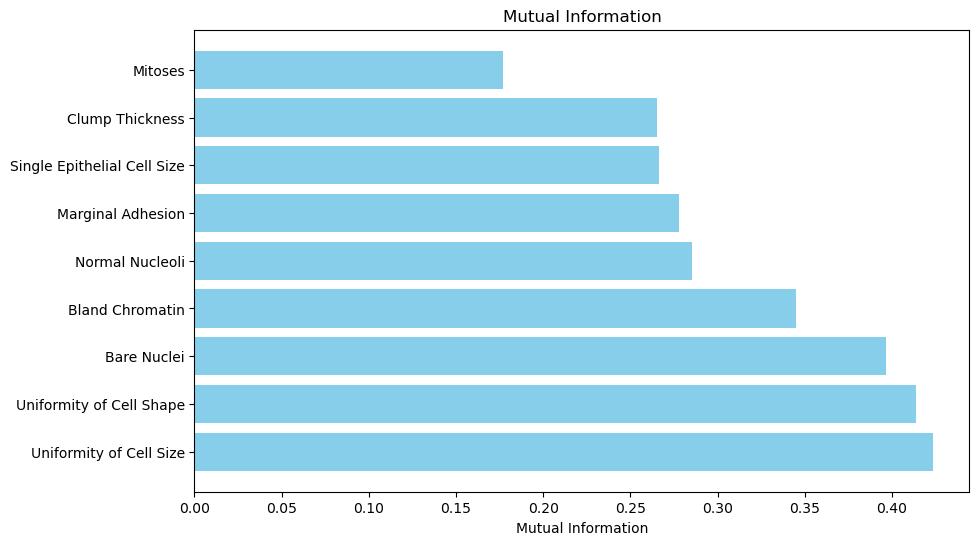

In [240]:
# Visualize the mutual information using a bar plot 
# Setup the plotting environment  
plt.figure(figsize=(10, 6))  

# Horizontal bar plot for the mutual information
plt.barh(mi_df['Feature'], mi_df['Mutual Information'], color='skyblue')  

# Aesthetic aspects of the plot
plt.xlabel('Mutual Information')  
plt.title('Mutual Information')  
plt.show()

In [241]:
# Set a fixed threshold 
fixed_threshold = 0.2

# Using fixed threshold  
significant_features_mi = mi_df[mi_df['Mutual Information'] > fixed_threshold]
print("Selected features:")  
print(significant_features_mi) 

Selected features:
                       Feature  Mutual Information
1      Uniformity of Cell Size            0.423210
2     Uniformity of Cell Shape            0.413861
5                  Bare Nuclei            0.396486
6              Bland Chromatin            0.344767
7              Normal Nucleoli            0.285219
3            Marginal Adhesion            0.277546
4  Single Epithelial Cell Size            0.266370
0              Clump Thickness            0.265308


In [242]:
# Validate MI
# Get feature names as a list  
selected_feature_names = significant_features_mi['Feature'].tolist()         

# Separate features and target variable
X_selected_MI = df_Scaled[selected_feature_names]              # Features
y = df_Scaled['Class']                                         # Target variable

In [243]:
# Initialize the KNN classifier
clf_mi = KNeighborsClassifier(n_neighbors = 1)

# Perform cross-validation to check accuracy after mutual information
accuracy_mi = np.mean(cross_val_score(clf_mi, X_selected_MI, y, scoring='accuracy', cv=10))
print(f"\nCross-validated accuracy after mutual information: {accuracy_mi:.4f}") 


Cross-validated accuracy after mutual information: 0.9321


<div id="output"> 
    <h2>Output the results</h2>    
</div>  

In [244]:
# Output the results of different feature selection methods   
print('\nFilter method result:', accuracy_fm)     # Print accuracy score for filter (correlation analysis) method  
print('\nRFE result:', accuracy_rfe)              # Print accuracy score for recursive feature elimination (RFE) method
print('\nMI result:', accuracy_mi)                # Print accuracy score for mutual information method


Filter method result: 0.9321151716500553

RFE result: 0.9343853820598007

MI result: 0.9321151716500553


In [245]:
print('\nUsing features that obtained from recursive feature elimination (RFE) because it had better accuracy \n')


Using features that obtained from recursive feature elimination (RFE) because it had better accuracy 



**Final dataset** after feature selection
<hr>

In [246]:
# Final dataset after feature selection (recursive feature elimination (RFE))
# Extract the names of the selected features 
selected_features = significant_features_rfe.tolist()
print('\nselected features:\n', selected_features)


selected features:
 ['Clump Thickness', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Bare Nuclei', 'Bland Chromatin', 'Mitoses']


In [247]:
# Create the final dataframe with the selected features and add the target column
df_final = df_Scaled[selected_features] 
df_final['Class'] = df_Scaled['Class']

# Display the final dataframe
print("Final dataframe with selected features and target column:") 
display(df_final)

Final dataframe with selected features and target column:


,Clump Thickness,Uniformity of Cell Shape,Marginal Adhesion,Bare Nuclei,Bland Chromatin,Mitoses,Class
0,-0.101794,-1.012208,-0.851002,-0.955748,-0.423712,-0.398327,0
1,-0.101794,-0.052680,0.443008,1.369784,-0.423712,-0.398327,0
2,-0.805248,-1.012208,-0.851002,-0.697356,-0.423712,-0.398327,0
3,0.249933,1.226691,-0.851002,-0.180571,-0.423712,-0.398327,0
4,-0.453521,-1.012208,-0.203997,-0.955748,-0.423712,-0.398327,0
...,...,...,...,...,...,...,...
420,-0.805248,-1.012208,-0.851002,-0.955748,-0.805232,0.219516,0
421,-0.805248,-1.012208,-0.851002,-0.697356,-1.186753,-0.398327,0
422,-0.101794,1.866377,-0.203997,-0.438963,1.483890,0.219516,1
423,-0.453521,0.587006,0.119506,-0.180571,2.246931,-0.398327,1


In [248]:
# Check the distribution of the 'Class' variable
class_counts = df_final['Class'].value_counts()  
print("Class distribution:\n", class_counts)

Class distribution:
 Class
1    213
0    212
Name: count, dtype: int64


<hr>
<div id="classification"> 
    <h2>Classification</h2>    
</div>
<div>
    <ol>
        <li><a href="#knn">K-Nearest Neighbors (KNN)</a></li>   
    </ol>
</div>
<br>

In [294]:
# Separate features and target variable  
X = df_final.drop('Class', axis=1)              # Features  
y = df_final['Class']                           # Target variable

# Split the dataset into training and testing sets (80/20) 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [295]:
print('\nThe shape of the X_train dataset -->', X_train.shape)
print('\nThe shape of the Y_train dataset -->', Y_train.shape)
print('\nThe shape of the X_test dataset -->', X_test.shape)
print('\nThe shape of the Y_test dataset -->', Y_test.shape)
print('\n')


The shape of the X_train dataset --> (340, 6)

The shape of the Y_train dataset --> (340,)

The shape of the X_test dataset --> (85, 6)

The shape of the Y_test dataset --> (85,)




<hr>
<div id="knn">   
    <h2>K-Nearest Neighbors (KNN)</h2>    
</div>  
<div>  
    <ol>  
        <li>  
            <a href="#valid">Validating</a>  
            <ol>   
                <li><a href="#holdout">Holdout</a></li>   
                <li><a href="#rrs">Repeated Random Sampling</a></li>                
            </ol>  
        </li>  
        <li><a href="#test">Testing</a></li>  
        <li><a href="#roc">ROC plot and AUC score</a></li> 
        <li><a href="#tuning">Tuning KNN</a></li>
        <li><a href="#roc">ROC plot and AUC score after tuning KNN</a></li>   
        <li><a href="#output">Output the results</a></li> 
    </ol>  
</div>  
<br>

<div id="holdout"> 
    <h2>Holdout</h2>    
</div>

In [296]:
# Holdout 
# Split the dataset into training and validating sets (80/20)
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

# Train a KNN classifier (with K=5)
clf_knn_h = KNeighborsClassifier(n_neighbors = 5)

# Fit the model to the training data
clf_knn_h.fit(x_train, y_train)

KNeighborsClassifier()

In [297]:
# Predict the labels for the validating data
y_predict = clf_knn_h.predict(x_val)

# Evaluate model performance
print('\nHoldout result:')
accuracy_score_holdout = accuracy_score(y_val, y_predict)
print('\nAccuracy  -->', accuracy_score_holdout)
print('\n')


Holdout result:

Accuracy  --> 0.9852941176470589




<div id="rrs"> 
    <h2>Repeated Random Sampling</h2>    
</div>

In [298]:
# Repeated random sampling

Accuracy = []             # Initialize a list to store accuracy results
num_repeats = 10          # Number of times to repeat random sampling

# Perform repeated random sampling
for i in range(num_repeats):

    # Split the dataset into training and validating sets (80/20)
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

    # Train a KNN classifier (with K=5)
    clf_knn_rrs = KNeighborsClassifier(n_neighbors = 5)

    # Fit the model to the training data
    clf_knn_rrs.fit(x_train, y_train)

    # Predict the labels for the validating data
    y_val_predict = clf_knn_rrs.predict(x_val)
    accuracy_score(y_val, y_val_predict)
    Accuracy.append(accuracy_score(y_val, y_val_predict))

In [299]:
# Evaluate model performance
df_Accuracy = pd.DataFrame(Accuracy, columns=['Accuracy'])
print('\nAccuracy in 10 iterations for different train and validation sets:\n')
display(df_Accuracy)

accuracy_score_rrs = df_Accuracy.Accuracy.mean()
print('\nThe mean of different accuracies for validating the model -->', accuracy_score_rrs)
print('\n')


Accuracy in 10 iterations for different train and validation sets:



,Accuracy
0,0.985294
1,0.985294
2,0.985294
3,0.985294
4,0.985294
5,0.985294
6,0.985294
7,0.985294
8,0.985294
9,0.985294



The mean of different accuracies for validating the model --> 0.9852941176470587




<div id="test"> 
    <h2>Testing</h2>    
</div>

In [300]:
# Testing
# Train a KNN classifier (with K=5)
clf_knn_test = KNeighborsClassifier(n_neighbors = 5)

# Fit the model to the training data
clf_knn_test.fit(X_train, Y_train)

# Predict the labels for the testing data
Y_predict = clf_knn_test.predict(X_test)

In [301]:
# Evaluate model performance
print('\nTesting the model:\n')

accuracy_score_knn_testing = accuracy_score(Y_test, Y_predict)
print('\nAccuracy  -->', accuracy_score_knn_testing)
print('\nRecall or Sensitivity or TPR --->', recall_score(Y_test, Y_predict))
print('\nPrecision -->', precision_score(Y_test, Y_predict))
print('\nF1_score -->', f1_score(Y_test, Y_predict))
print('\n')


Testing the model:


Accuracy  --> 0.9411764705882353

Recall or Sensitivity or TPR ---> 0.9318181818181818

Precision --> 0.9534883720930233

F1_score --> 0.9425287356321839




In [302]:
# Generate and display the classification report
print('\nClassification report:\n', classification_report(Y_test, Y_predict))


Classification report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        41
           1       0.95      0.93      0.94        44

    accuracy                           0.94        85
   macro avg       0.94      0.94      0.94        85
weighted avg       0.94      0.94      0.94        85



In [303]:
# Generate and display the confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_predict, Y_test)

# Create a dataframe for the confusion matrix for better visualization
confusion_matrix_dataframe = pd.DataFrame(confusion_matrix, columns = ['benign present', 'malignant present'], 
                                          index = ['test benign', 'test malignant'])
print("\nConfusion matrix:\n")
display(confusion_matrix_dataframe)
print('\n')


Confusion matrix:



,benign present,malignant present
test benign,39,3
test malignant,2,41


<div id="roc"> 
    <h2>ROC plot and AUC score</h2>    
</div>

In [304]:
# ROC
def plot_roc_curve(y_test, y_prid):

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prid)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.grid()


AUC score: 0.9415188470066518




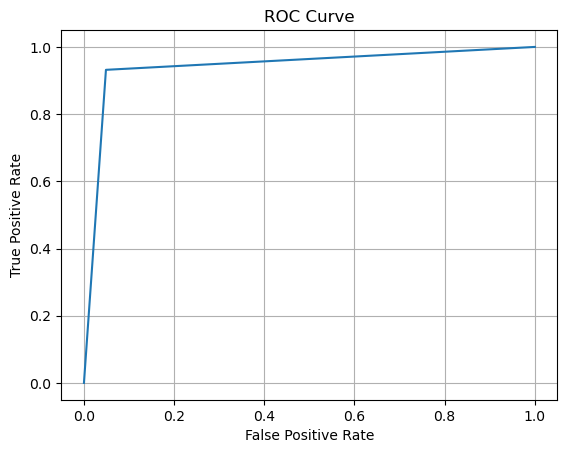

In [305]:
#ROC plot and AUC score
plot_roc_curve(Y_test, Y_predict)

# Calculate AUC score
auc_score = roc_auc_score(Y_test, Y_predict)   
print('\nAUC score:', auc_score)
print('\n')

<div id="tuning"> 
    <h2>Tuning KNN</h2>    
</div>

In [306]:
# Defining the hyperparameter  
param_dist_knn = {  
    'n_neighbors': range(1, 11),                              # Number of neighbors to consider  
    'weights': ['uniform', 'distance'],                       # Weighting function used in prediction  
    'metric': ['euclidean', 'manhattan', 'minkowski'],        # Distance metrics  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],   # Algorithm used to compute the nearest neighbors  
    'p': range(1, 3),                                         # Power parameter for Minkowski distance (1: Manhattan, 2: Euclidean)  
    'leaf_size': range(1, 21)                                 # Leaf size passed to the underlying tree-based algorithms  
}   

In [307]:
# Train a KNN classifier  
clf_knn = KNeighborsClassifier()  

# Set up RandomizedSearchCV with the KNN classifier and the hyperparameter distribution  
# Specify n_iter to control how many random combinations to try  
random_search = RandomizedSearchCV(estimator=clf_knn, param_distributions=param_dist_knn,  
                                   n_iter=200, cv=5, verbose=1, n_jobs=-1, random_state=0)  

# Fit the model to the training data  
random_search.fit(X_train, Y_train) 

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': range(1, 21),
                                        'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': range(1, 11),
                                        'p': range(1, 3),
                                        'weights': ['uniform', 'distance']},
                   random_state=0, verbose=1)

In [308]:
# Output the best hyperparameters and best score found by RandomizedSearch  
print("Best parameters:", random_search.best_params_)  
print("Best cross-validation score:", random_search.best_score_)

Best parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 5, 'metric': 'minkowski', 'leaf_size': 15, 'algorithm': 'kd_tree'}
Best cross-validation score: 0.9588235294117646


In [309]:
# Test the best model on the test set  
best_knn = random_search.best_estimator_  

# Predict the labels  
y_pred = best_knn.predict(X_test)

In [310]:
# Evaluate model performance  
print('\nTuning the model:\n')

accuracy_score_knn_tuning = accuracy_score(Y_test, y_pred)
print('\nAccuracy  -->', accuracy_score_knn_tuning)  
print('\nRecall or Sensitivity or TPR --->', recall_score(Y_test, y_pred))  
print('\nPrecision -->', precision_score(Y_test, y_pred))  
print('\nf1_score -->', f1_score(Y_test, y_pred)) 
print('\n')


Tuning the model:


Accuracy  --> 0.9411764705882353

Recall or Sensitivity or TPR ---> 0.9318181818181818

Precision --> 0.9534883720930233

f1_score --> 0.9425287356321839




In [311]:
# Generate and display the classification report
print('\nClassification_report:\n\n', classification_report(Y_test, y_pred))  
print('\n')


Classification_report:

               precision    recall  f1-score   support

           0       0.93      0.95      0.94        41
           1       0.95      0.93      0.94        44

    accuracy                           0.94        85
   macro avg       0.94      0.94      0.94        85
weighted avg       0.94      0.94      0.94        85





In [312]:
# Generate and display the confusion matrix  
confusion_matrix = metrics.confusion_matrix(y_pred, Y_test)  

# Create a dataframe for the confusion matrix for better visualization  
confusion_matrix_dataframe = pd.DataFrame(confusion_matrix, columns=['Predicted Benign', 'Predicted Malignant'], 
                                          index=['Actual Benign', 'Actual Malignant'])  
print("\nConfusion Matrix:\n")  
display(confusion_matrix_dataframe)  
print('\n')


Confusion Matrix:



,Predicted Benign,Predicted Malignant
Actual Benign,39,3
Actual Malignant,2,41


<div id="roc"> 
    <h2>ROC plot and AUC score after tuning KNN</h2>    
</div>

In [313]:
# ROC
def plot_roc_curve(y_test, y_prid):

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prid)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.grid()


AUC score: 0.9415188470066518




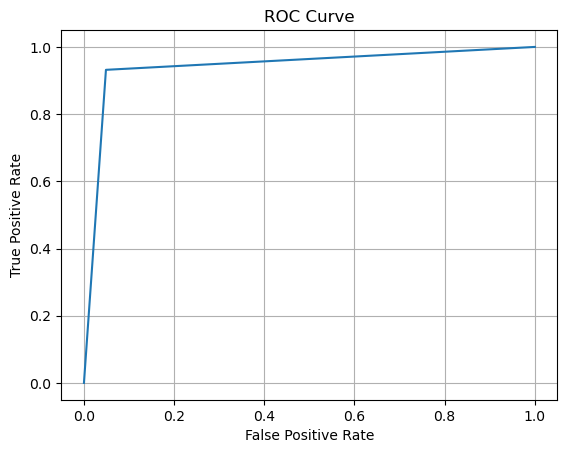

In [314]:
#ROC plot and AUC score
plot_roc_curve(Y_test, y_pred)

# Calculate AUC score
auc_score_tu = roc_auc_score(Y_test, y_pred)
print('\nAUC score:', auc_score_tu)
print('\n')

<div id="output"> 
    <h2>Output the results</h2>    
</div>

In [315]:
# Output the results of different validation methods and the Naive Bayes testing  
print('\nHoldout result:', accuracy_score_holdout)                       # Print accuracy score for the holdout method  
print('\nRepeated random sampling result:', accuracy_score_rrs)          # Print accuracy score for repeated random sampling method 
print('\nKNN testing result:', accuracy_score_knn_testing)               # Print accuracy score for KNN testing
print('\nKNN tuning result:', accuracy_score_knn_tuning)                 # Print accuracy score for KNN tuning 
print('\nAUC score:', auc_score)                                         # Print AUC score for the model
print('\nAUC score after tuning:', auc_score_tu)                         # Print AUC score for the model after tuning


Holdout result: 0.9852941176470589

Repeated random sampling result: 0.9852941176470587

KNN testing result: 0.9411764705882353

KNN tuning result: 0.9411764705882353

AUC score: 0.9415188470066518

AUC score after tuning: 0.9415188470066518
